In [673]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
import plotly.express as px
pd.options.display.max_rows = 10

# 📰 Fake News Detection Model - Project Plan


**Created by:** [Glen Valencius](https://github.com/glenvj-j)  
**Dataset Source:** [Kaggle](https://www.kaggle.com/datasets/mahdimashayekhi/fake-news-detection-dataset/data)

## 📌 Objective
Develop a predictive model to classify news articles as **real** or **fake**, with a primary focus on **minimizing False Negatives**—i.e., fake news incorrectly classified as real—while also reducing False Positives.



## 📋 Project Scope

- **Goal**: Build a robust classification model to detect fake news articles.
- **Features Used**:
  - 📝 **Text Data**: `title`, `text`
  - 🧾 **Categorical Data**: `source`, `author`, `category`
  - 📆 **Date Information**: `month`, `day`, `year` (included as remainder or engineered further)



## ⚙️ Feature Engineering Strategy

- 🔤 **Text Vectorization**:
  - Apply `TfidfVectorizer` on `title` and `text` to extract important terms.

- 🧩 **Categorical Encoding**:
  - Use **One-Hot Encoding** for `source` and `category`.
  - Apply **Binary or Ordinal Encoding** to `author` depending on cardinality.

- 📐 **Numerical Features**:
  - Scale numerical values like word counts using `RobustScaler`.

- 📅 **Date Fields**:
  - Include `month`, `day`, and `year` as is, or transform based on date patterns.



## 🧠 Modeling Considerations

- Focus on reducing **False Negatives (FN)** more heavily due to the high cost of misclassifying fake news as real.
- Also minimize **False Positives (FP)** to ensure reliability.
- Evaluation metrics will include:
  - **F2 Score** (heavier penalty on FN)



## ⚠️ Disclaimer
> This dataset has been synthetically generated to closely resemble real-world news content. While suitable for modeling and experimentation, the results should be validated on real data before any production deployment.


## Cleaning Data

In [674]:
df = pd.read_csv('dataset/fake_news_dataset.csv')
df.head(1)

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawyer hear outside continue reach difference yeah figure your power fear identify there protect security great national nothing fast story why late nearly bit cost tough since question to power almost future young conference behind ahead building teach million box receive Mrs risk benefit month compare environment class imagine you vote community reason set once idea him answer many how purpose deep training game own true language garden of partner result face military discover discover data glass bed maintain test way development across top culture glass yes decision hope necessary as trade organization talk debate peace stay community development six wide write itself several fight teach billion for common fear we personal church establish store kind hundred debate hotel cut sister audience sound case that stay within information trouble be debate great themselves responsibility force people hundred bar miss others sometimes build room interesting however charge what especially north no especially us travel industry about including face ten behind black series place age soldier early trouble middle would along case what money significant sound song reason poor free want thank cultural range shoulder rest movie political fear hear past leader up edge professor determine law act change middle prove say notice travel open director argue economic seven game matter season,2023-03-10,NY Times,Paula George,Politics,real


In [734]:
df['date'].min(),df['date'].max()

(Timestamp('2022-04-26 00:00:00'), Timestamp('2025-04-25 00:00:00'))

In [675]:
df.shape[0]

20000

In [676]:
# This function check all unique from each column
def check_all_unique(df) :
    pd.set_option('display.max_colwidth', None)
    listItem = []
    for col in df.columns :
        listItem.append( [col, df[col].nunique(), df[col].unique()])

    tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                        data=listItem)
    return tabel1Desc

check_all_unique(df[['date','source','author','category','label']])

,Column Name,Number of Unique,Unique Sample
0,date,1096,"[2023-03-10, 2022-05-25, 2022-09-01, 2023-02-07, 2023-04-03, 2023-12-02, 2022-06-01, 2024-12-31, 2022-09-08, 2022-11-08, 2024-06-24, 2025-02-10, 2022-04-27, 2023-07-17, 2025-03-04, 2023-09-17, 2024-09-14, 2024-11-20, 2024-10-15, 2024-04-18, 2023-12-17, 2023-10-19, 2024-11-24, 2022-08-05, 2023-02-24, 2022-08-12, 2023-06-28, 2023-02-12, 2023-08-30, 2023-11-19, 2025-03-17, 2022-05-26, 2023-09-23, 2022-04-26, 2024-04-27, 2023-10-07, 2023-12-16, 2023-01-15, 2023-08-15, 2022-12-15, 2022-07-06, 2023-08-22, 2023-03-14, 2023-08-06, 2023-04-21, 2023-03-25, 2024-03-12, 2022-07-09, 2022-09-18, 2023-05-26, 2022-04-30, 2025-02-05, 2025-03-27, 2024-07-27, 2022-05-22, 2023-05-06, 2024-01-11, 2023-07-25, 2023-07-09, 2023-02-23, 2024-01-18, 2023-02-20, 2024-11-15, 2023-03-22, 2023-06-01, 2024-11-12, 2024-01-09, 2022-11-28, 2024-08-05, 2023-02-25, 2024-04-02, 2023-06-05, 2023-06-15, 2022-09-23, 2025-04-18, 2022-11-30, 2022-05-10, 2022-09-29, 2024-01-13, 2024-04-01, 2022-05-12, 2024-02-19, 2024-03-20, 2023-10-14, 2024-04-05, 2025-03-06, 2022-05-09, 2024-02-27, 2023-08-24, 2023-04-12, 2025-02-27, 2023-09-07, 2024-10-26, 2023-07-13, 2024-10-23, 2023-12-22, 2024-07-25, 2023-07-22, 2022-12-16, 2024-06-08, ...]"
1,source,8,"[NY Times, Fox News, CNN, Reuters, Daily News, Global Times, The Guardian, BBC, nan]"
2,author,17051,"[Paula George, Joseph Hill, Julia Robinson, Mr. David Foster DDS, Austin Walker, Sherri Fry, Alyssa Young, Tina Garrett, Heather Greene, Erin Hanson, Douglas Evans, Andrew Chapman, Diane Hayden, Roy Trujillo, Gerald Jenkins, Karen Floyd MD, James Williams, David Burgess, Andrew Robinson, nan, Jacqueline Matthews, Nicole Baker, John Lynn, Tonya Anderson, John Turner, Stephen Parks, Desiree Castro, Kathy Cabrera, Melanie Harding, Maria Walker, John Jordan, Thomas Carney, Daniel Bryan, Amy Wolf, Michael Meadows, Brianna Obrien, Robert Wilson, Devon Phillips, Robert Mcclure, Marcus Cooke, Matthew Smith, Jon Zamora, Emily Bradley, Karl Morales, Andrea Hicks, Brian Hull, Ernest Bell, Christina Christian, Cheryl Wilson, Tyler Melton, Mark Vega, Michael Bradley, Ian Rogers, Brandon Pittman, Micheal Bennett, Kristen Wilson, Jessica Martinez, John Newman, Kenneth Bright, Stacy Crawford, Kyle Williams, Shari Obrien, Kimberly Little, Joshua Kelly, Laurie Hill, Christopher Morrison, Kelli Shea, Alexis Gallegos, Todd Matthews, Michael Mendez, Jordan Brown, Richard Reese, Brian Garcia, Kimberly Soto, Angela Holmes MD, Gloria Byrd, Meghan Moore, Sabrina Phillips, Melissa Bishop, Joanna Skinner, Emily Cook, Keith Beck, William Wong, Matthew Jones, Jason Peterson, Jerry Rose, Ashley Mcgee, Shawn Mckee, Megan Hernandez, Desiree Long, Allison Contreras, Heidi Mcclain, Donna Martinez, Charles Torres, Derrick Roberts, Bethany Garcia, Kevin Flynn, Katherine Ruiz, Brett Bailey, Kristina Hawkins, ...]"
3,category,7,"[Politics, Business, Science, Technology, Health, Sports, Entertainment]"
4,label,2,"[real, fake]"


In [677]:
def check_duplicate(df):
    if df.duplicated().sum() > 0:
        total_duplicated = df.duplicated().sum()
        total_percentage_duplicated = round(total_duplicated / df.shape[0] * 100, 2)
        original_data = df.shape[0]
        print(f'Total Duplicated Data: {total_duplicated} rows ({total_percentage_duplicated}% of overall data)')
        duplicated_rows = df[df.duplicated()]
        display(duplicated_rows)

        if total_percentage_duplicated < 1:
            user_input = input("Do you want to delete the duplicated data? (yes/no): ").strip().lower()
            if user_input in ("yes", "y"):
                df.drop_duplicates(inplace=True)
                after_data = df.shape[0]
                print(f'Duplicated data successfully deleted. Total deleted: {original_data - after_data}')
            else:
                print("No action taken. Duplicated data was not deleted.")
        else:
            print("Duplicated data is more than 1% of the dataset. Please check manually.")
        return duplicated_rows.index
    else:
        print("No duplicated data found.")
        return None
duplicated_index = check_duplicate(df)


No duplicated data found.


In [678]:
def check_data_summary(df):
    # Create DataFrame for NaN summary
    nan_summary = pd.DataFrame({
        'Total NaN': df.isna().sum(),
        'Percentage NaN': round(df.isna().sum() / df.shape[0] * 100, 2),
        'Non-Null Count': df.notnull().sum(),
        'Data Type': df.dtypes
    })

    nan_summary = nan_summary.reset_index().rename(columns={'index': 'Column Name'})
    nan_df = nan_summary.sort_values(by='Percentage NaN', ascending=False)
    print('=============== Data Summary ===============')
    display(nan_df)
    return nan_df

nan = check_data_summary(df)

=============== Data Summary ===============


,Column Name,Total NaN,Percentage NaN,Non-Null Count,Data Type
3,source,1000,5.0,19000,object
4,author,1000,5.0,19000,object
0,title,0,0.0,20000,object
1,text,0,0.0,20000,object
2,date,0,0.0,20000,object
5,category,0,0.0,20000,object
6,label,0,0.0,20000,object


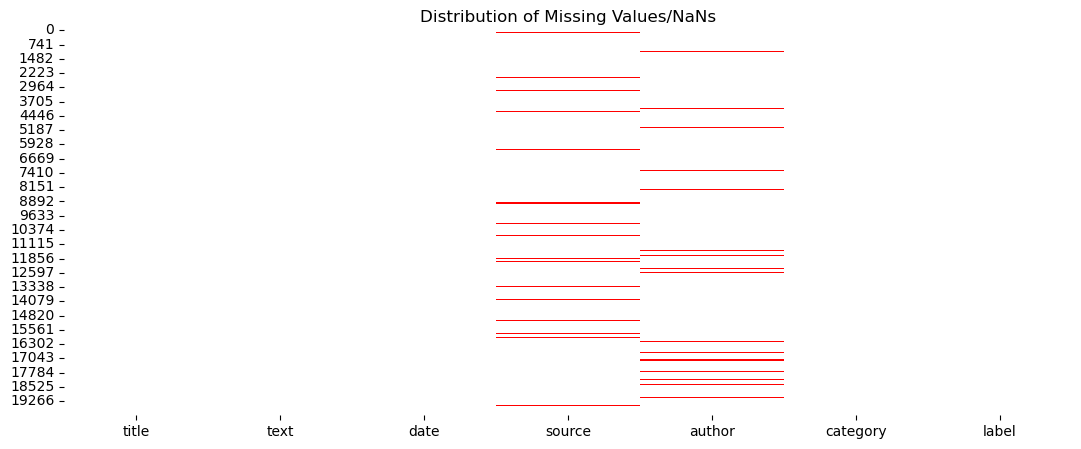

Found 1910 rows with inconsistent Missing Values: [19, 21, 23, 52, 55, 72, 77, 80, 87, 89, 94, 101, 115, 131, 138, 144, 150, 158, 160, 162, 178, 179, 208, 215, 228, 254, 259, 266, 285, 308, 315, 316, 318, 321, 327, 337, 369, 377, 393, 396, 402, 419, 458, 465, 483, 485, 496, 498, 509, 525, 527, 542, 557, 564, 567, 574, 584, 605, 608, 615, 618, 629, 638, 641, 646, 653, 655, 659, 663, 666, 680, 681, 690, 697, 702, 723, 728, 729, 744, 746, 767, 776, 803, 812, 852, 855, 869, 886, 891, 893, 914, 924, 928, 954, 958, 970, 981, 985, 991, 996, 1001, 1011, 1038, 1044, 1045, 1052, 1054, 1062, 1068, 1074, 1078, 1079, 1083, 1086, 1102, 1124, 1140, 1143, 1147, 1181, 1185, 1188, 1191, 1202, 1222, 1226, 1235, 1263, 1267, 1274, 1277, 1284, 1288, 1290, 1294, 1314, 1325, 1326, 1335, 1341, 1348, 1351, 1352, 1360, 1365, 1372, 1374, 1381, 1388, 1393, 1408, 1411, 1440, 1450, 1457, 1486, 1494, 1528, 1530, 1537, 1538, 1547, 1548, 1564, 1568, 1570, 1597, 1603, 1632, 1636, 1650, 1651, 1664, 1667, 1678, 1701, 1738

In [679]:
# Distribution of Missing Value/NaN 
def check_NaN_distribution(df):
    plt.figure(figsize=(13,5))
    plt.title('Distribution of Missing Values/NaNs')
    sns.heatmap(df[df.columns].isna(),cbar=False, cmap=sns.color_palette(["white", "red"]))
    plt.show()

    # Filter columns that contain NaNs
    cols_with_nan = df.isna().sum()[df.isna().sum() > 0].index

    # Create a list of Boolean Series indicating where NaNs are
    nan_masks = [df[col].isna() for col in cols_with_nan]

    # Loop through each row and check if the NaNs align
    misaligned_rows = []

    for index, row in df.iterrows():
        # Use .loc[index] to get boolean for this row
        row_alignment = [mask.loc[index] for mask in nan_masks]

        if len(set(row_alignment)) > 1:  # If some columns are NaN and some are not
            misaligned_rows.append(index)

    # Check if NaN values appear together in the same row
    print(f"Found {len(misaligned_rows)} rows with inconsistent Missing Values: {misaligned_rows}")

check_NaN_distribution(df)

In [680]:
df['source'].value_counts()
df['author'].value_counts()

author
Michael Smith          12
John Smith             11
Christopher Johnson     9
Jennifer Davis          7
Michael Lee             7
                       ..
Andrew Stark            1
Samuel Gates            1
Kristen Buchanan        1
Deborah Leon            1
David Wise              1
Name: count, Length: 17051, dtype: int64

In [681]:
df['source'] = df['source'].fillna('Unkown')
df['author'] = df['author'].fillna(np.nan)

In [682]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['source'] = pd.Categorical(df['source'])
df['category'] = pd.Categorical(df['category'])
df['label'] = df['label'].map({'fake': True, 'real': False}).astype(bool)
df = df.rename(columns={'label':'fake_news'})
df['text_count'] = df['text'].str.split().apply(lambda x : len(x))
df['title_count'] = df['title'].str.split().apply(lambda x : len(x))
df

,title,text,date,source,author,category,fake_news,month,day,year,text_count,title_count
0,Foreign Democrat final.,more tax development both store agreement lawyer hear outside continue reach difference yeah figure your power fear identify there protect security great national nothing fast story why late nearly bit cost tough since question to power almost future young conference behind ahead building teach million box receive Mrs risk benefit month compare environment class imagine you vote community reason set once idea him answer many how purpose deep training game own true language garden of partner result face military discover discover data glass bed maintain test way development across top culture glass yes decision hope necessary as trade organization talk debate peace stay community development six wide write itself several fight teach billion for common fear we personal church establish store kind hundred debate hotel cut sister audience sound case that stay within information trouble be debate great themselves responsibility force people hundred bar miss others sometimes build room interesting however charge what especially north no especially us travel industry about including face ten behind black series place age soldier early trouble middle would along case what money significant sound song reason poor free want thank cultural range shoulder rest movie political fear hear past leader up edge professor determine law act change middle prove say notice travel open director argue economic seven game matter season,2023-03-10,NY Times,Paula George,Politics,False,3,10,2023,216,3
1,To offer down resource great point.,probably guess western behind likely next investment consumer range wrong exactly once attack shoulder movie partner daughter on executive tonight factor push development pass question field firm accept I represent answer computer win fast small character total myself air must difficult green fast writer adult though individual learn interview our available drug against group produce before large wish find even media nature then last computer project story special stand lead build during ball contain road since history customer garden figure kind throw tell discuss remain view morning put mouth while serve great certain free two structure skin yard position suffer fast someone ok mind must something outside position write theory ok letter for debate seat top fall authority bit deep there get man view loss bring friend free certain economic final occur summer similar best discover area real area still scientist social everybody front direction arrive open own down next lawyer baby already size stand put financial sister clear whether save into realize right break quickly music customer price prevent truth effort which probably strong friend everything also body together political interview least research benefit why dog mean near interest unit seek blood leader husband bring teacher age apply fill guess store south woman television worry build young style maybe agreement ability relate amount actually quite whose smile student current mother simply gun store Republican none when shoulder market admit knowledge animal majority product attorney approach on probably,2022-05-25,Fox News,Joseph Hill,Politics,True,5,25,2022,238,6
2,Himself church myself carry.,them identify forward present success risk several front pull blood choose born prove we clear approach language election future plant other those yourself all thing side soon guy vote him should practice dream until find despite less artist minute although teacher social eye top less make back care thus much small act outside college because up travel continue night name military room himself instead many month follow long president community people like attention fall crime history despite fill recently need commercial investment address send religious join opportunity story but idea exactly back difference loss degree whose throughout lead response almost 

In [683]:
print(f'The data range is from {df['date'].min()} to {df['date'].max()}')

The data range is from 2022-04-26 00:00:00 to 2025-04-25 00:00:00


# Analyze
## Explanatory Data Analysis

### Text Count for Fake and Real News

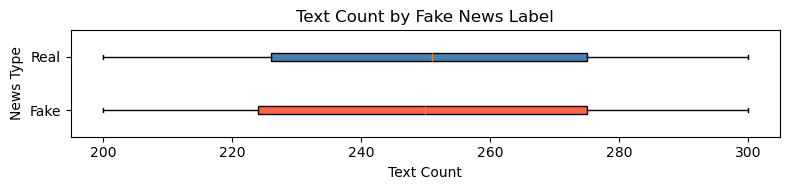

In [684]:
import matplotlib.pyplot as plt

fake = df[df['fake_news'] == True]['text_count']
real = df[df['fake_news'] == False]['text_count']

data = [fake, real]
labels = ['Fake', 'Real']
colors = ['tomato', 'steelblue']

fig, ax = plt.subplots(figsize=(8, 2))  # Reduce height here
bp = ax.boxplot(data, vert=False, patch_artist=True, labels=labels)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Text Count by Fake News Label')
ax.set_xlabel('Text Count')
ax.set_ylabel('News Type')
plt.tight_layout()
plt.show()


In [685]:
# import library untuk 2 sample t-Test
from scipy.stats import mannwhitneyu

category1 = 'Fake'
category2 = 'Real'

# Define hypotheses
Ho = f"Median {category1} = Median {category2}"  # Null hypothesis: no difference
Ha = f"Median {category1} ≠ Median {category2}"  # Alternative hypothesis: there is a difference


# Put Which function to use here
stat, pvaluemw = mannwhitneyu(
    df[df['fake_news']==True]['text_count'].median(), 
    df[df['fake_news']==False]['text_count'].median(),
    alternative="two-sided")

# Conclusion
if pvaluemw >= 0.05:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluemw}. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the {Ho}.
    (There is no statistically significant difference in median between the two.)
    ''')
else:
    print(f'''
    Null Hypothesis (Ho): {Ho}
    Alternative Hypothesis (Ha): {Ha}
    
    p-value = {pvaluemw}. Since p-value < 0.05, we reject the null hypothesis.
    Conclusion: We have sufficient evidence to say that the {Ha}.
    (There is a statistically significant difference in median between the two.)
    ''')


    Null Hypothesis (Ho): Median Fake = Median Real
    Alternative Hypothesis (Ha): Median Fake ≠ Median Real
    
    p-value = 1.0. Since p-value ≥ 0.05, we fail to reject the null hypothesis.
    Conclusion: We do NOT have sufficient evidence to say that the Median Fake = Median Real.
    (There is no statistically significant difference in median between the two.)
    


Insight :

If we see the boxplot, the fake news is shorter than the real. But we test with statistic and the result is not significant, the conclusion is the lenght of text not significantly different between Fake and Real news.

### Author Count of Fake News

we will see who the most write fake news, the result will be in percentage.

We filter the one that write only True News

In [752]:
df_author = df.groupby('author')['fake_news'].value_counts().unstack().fillna(0)
df_author['percentange'] = df_author[False]/(df_author[True]+df_author[False])*100
df_author = df_author[df_author['percentange']>0].sort_values(by=True,ascending=False)
df_author

fake_news,False,True,percentange
author,,,
James Smith,1.0,6.0,14.285714
John Brown,2.0,5.0,28.571429
Christopher Johnson,4.0,5.0,44.444444
Kimberly Smith,1.0,4.0,20.000000
Michael Smith,8.0,4.0,66.666667
...,...,...,...
Gloria Byrd,1.0,0.0,100.000000
Glenn Moore,1.0,0.0,100.000000
Glenn Maldonado,1.0,0.0,100.000000


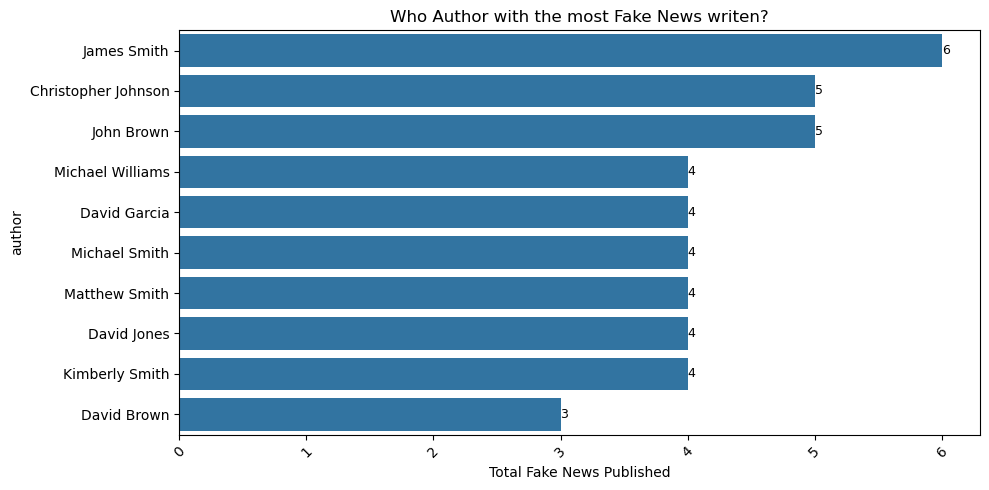

In [737]:
plt.figure(figsize=(10, 5))

# Create the barplot and capture the Axes object
ax = sns.barplot(
    data=df_author.sort_values(by=True, ascending=False).head(10),
    y='author', x=True
)

# Add annotations
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2.),
        ha='left', va='center', fontsize=9
    )
plt.title('Who Author with the most Fake News writen?')
plt.xticks(rotation=45)
plt.xlabel('Total Fake News Published')
plt.tight_layout()
plt.show()


Insight :

We can see in this visual we can see the most Author that write the Fake News.

### Which News Media with the most Fake News

In [688]:
df_source = df.groupby('source')['fake_news'].sum().reset_index().sort_values(by='fake_news',ascending=False)
df_source['source'] = df_source['source'].astype('str')
df_source

,source,fake_news
2,Daily News,1225
5,NY Times,1220
1,CNN,1202
3,Fox News,1198
7,The Guardian,1188
0,BBC,1178
6,Reuters,1176
4,Global Times,1166
8,Unkown,503


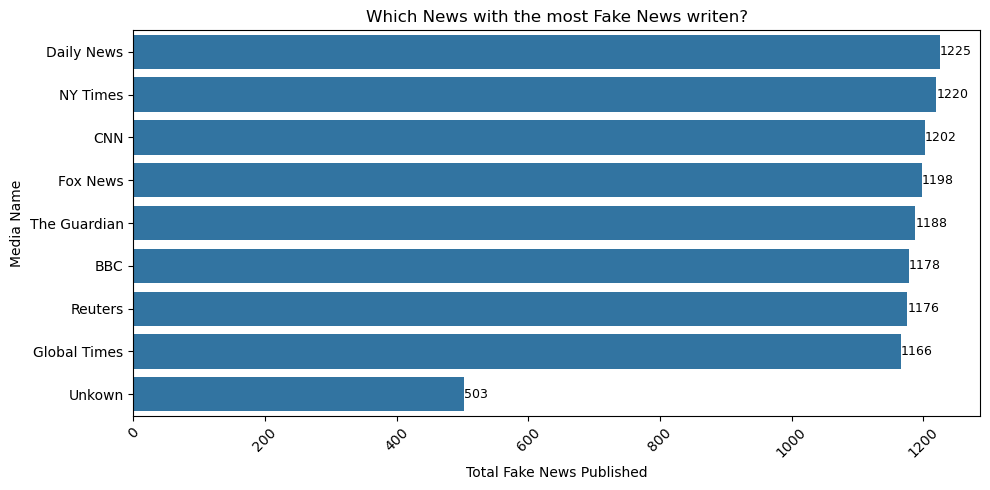

In [762]:
plt.figure(figsize=(10, 5))

# Create the barplot and capture the Axes object
ax = sns.barplot(
    data=df_source.head(10),
    x='fake_news', y='source'
)

# Add annotations
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2.),
        ha='left', va='center', fontsize=9
    )
plt.title('Which News with the most Fake News writen?')
plt.xlabel('Total Fake News Published')
plt.ylabel('Media Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight :

The News outlet with most Fake news is Daily News, NY Times, CNN. But if we can see the total is not significantly difference.

### When is the most Fake News published

In [690]:
df_date = df.groupby(['year','month'])[['fake_news']].sum().reset_index()
df_date

,year,month,fake_news
0,2022,4,40
1,2022,5,255
2,2022,6,270
3,2022,7,273
4,2022,8,281
...,...,...,...
32,2024,12,298
33,2025,1,310
34,2025,2,269
35,2025,3,274


In [691]:
# Plot with color=hue by year

# Find the max point
max_val = df_date['fake_news'].max()
max_row = df_date[df_date['fake_news'] == max_val].iloc[0]

fig = px.line(df_date, x="month", y="fake_news", color="year", title='Fake News Trend by Year')
# Add annotation at the max point
fig.add_annotation(
    x=max_row['month'],
    y=max_row['fake_news'],
    text=f"Max: {max_val}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="yellow",
    font=dict(color="black")
)

fig.show()

### WordCloud

We will try to find which word often used in False and Real News

In [692]:
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

def to_lower(text):
    return text.lower()

def remove_contraction(text):
    return contractions.fix(text)

def remove_number(text):
    return ''.join([char for char in text if not char.isnumeric()])

def remove_punctuation(text):
    return ''.join([char for char in text if not char in punctuation])

list_to_add_to_result = 'not'
list_to_remove_from_result = ["mr", "new"]
stopword = stopwords.words('English')
stopword = stopword + list_to_remove_from_result  # Ignore these

stopword.remove(list_to_add_to_result)
def remove_stopword(text):
    return ' '.join([char for char in text.split() if not char in stopword]) # if di kanan buat filtering


def remove_white_space(text):
    return ' '.join(text.split())

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    list_hasil = []

    for sentence in nltk.sent_tokenize(text): # memecah paragraf jadi kalimat
        for word in nltk.word_tokenize(sentence): #memecah kalimat jadi kata
            list_hasil.append(lemmatizer.lemmatize(word))

    hasil = ' '.join(list_hasil)
    return hasil

def combine_cleaning(series):
    to_lowered = series.apply(to_lower)
    no_contractions = to_lowered.apply(remove_contraction)
    no_numbers = no_contractions.apply(remove_number)
    no_punct = no_numbers.apply(remove_punctuation)
    no_stopwords = no_punct.apply(remove_stopword)
    no_whitespace = no_stopwords.apply(remove_white_space)
    lemmatized = no_whitespace.apply(lemmatize)
    return lemmatized

In [693]:
df_clean = combine_cleaning(df['text'])
df_clean

0                                                                                                                                                                                                                                                                                                                                                                                                                    tax development store agreement lawyer hear outside continue reach difference yeah figure power fear identify protect security great national nothing fast story late nearly bit cost tough since question power almost future young conference behind ahead building teach million box receive mr risk benefit month compare environment class imagine vote community reason set idea answer many purpose deep training game true language garden partner result face military discover discover data glass bed maintain test way development across top culture glass yes decision hope necessary trade organizat

In [694]:
def word_freq(text):
    df_text = text.str.extractall(r'(\w+)') #mengambil tiap kata dari tiap dokumen
    df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={0:'word','count':'freq'})
    return df_unique

df_fake = word_freq(df_clean.loc[df[df['fake_news']==True].index])
df_fake

,word,freq
0,summer,2753
1,wide,2742
2,moment,2722
3,direction,2719
4,rich,2718
...,...,...
863,behind,2465
864,big,2453
865,still,2449
866,parent,2439


In [695]:
df_real = word_freq(df_clean.loc[df[df['fake_news']==False].index])
df_real

,word,freq
0,economy,2742
1,member,2727
2,reflect,2718
3,purpose,2708
4,else,2708
...,...,...
863,model,2422
864,standard,2408
865,seek,2405
866,far,2390


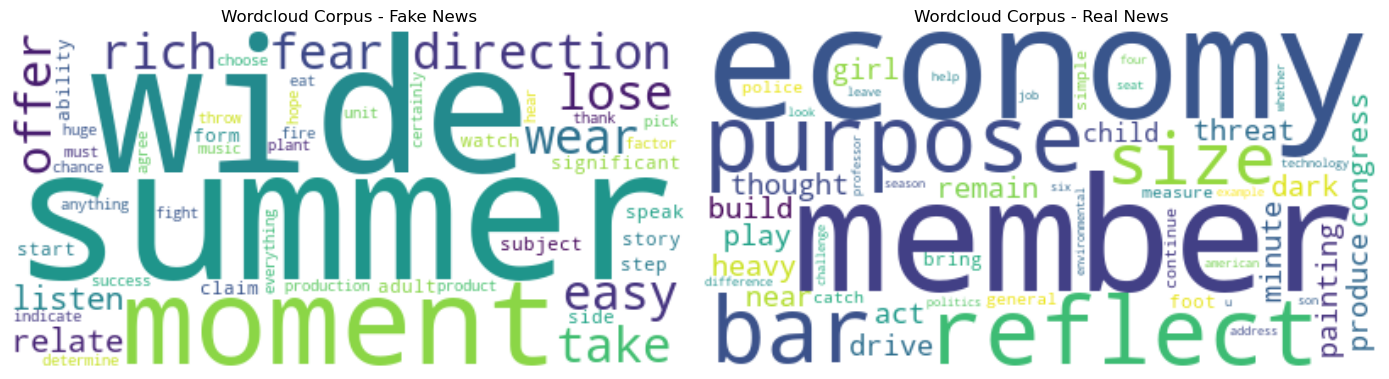

In [696]:
from wordcloud import WordCloud

# Generate text for Fake News
text_fake = ' '.join(
    df_clean.loc[df[df['fake_news'] == True].index]
    .str.extractall(r'(\w+)')[0]
    .to_list()
)

# Generate text for Real News
text_real = ' '.join(
    df_clean.loc[df[df['fake_news'] == False].index]
    .str.extractall(r'(\w+)')[0]
    .to_list()
)

# Create wordclouds
wordcloud_fake = WordCloud(max_words=50, background_color='white').generate(text_fake)
wordcloud_real = WordCloud(max_words=50, background_color='white').generate(text_real)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(wordcloud_fake, interpolation='bilinear')
axes[0].set_title('Wordcloud Corpus - Fake News')
axes[0].axis('off')

axes[1].imshow(wordcloud_real, interpolation='bilinear')
axes[1].set_title('Wordcloud Corpus - Real News')
axes[1].axis('off')

plt.tight_layout()
plt.show()


The Fake News most word used is Summer, Moment and Wide. Maybe most Fake news come out in summer time

Real News is often used word economy, member and reflect.

Disclaimer : This dataset has been synthetically generated to closely resemble real news articles.

### Which Category with the most Fake News

In [697]:
df_category = df.groupby('category')['fake_news'].sum().reset_index().sort_values(by='fake_news',ascending=False)
df_category['category'] = df_category['category'].astype('str')
df_category

,category,fake_news
2,Health,1482
0,Business,1471
1,Entertainment,1460
5,Sports,1444
6,Technology,1424
3,Politics,1399
4,Science,1376


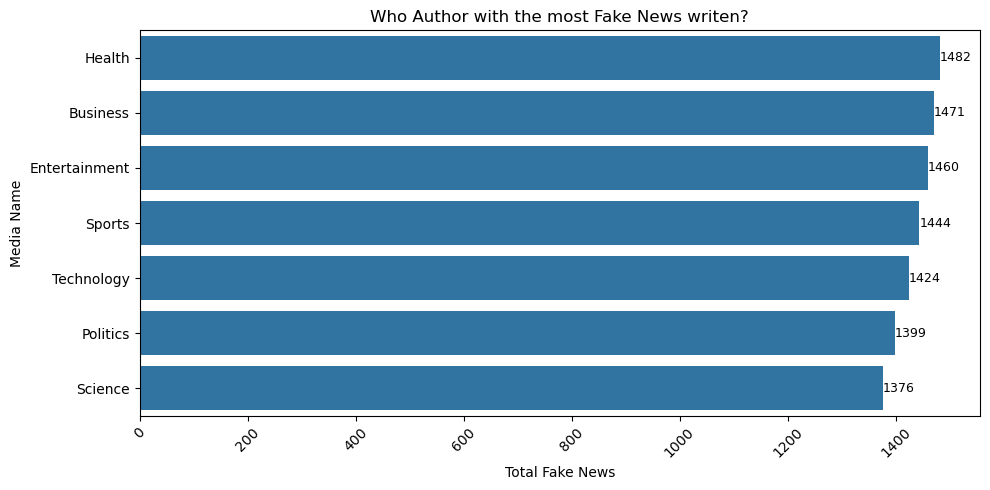

In [698]:
plt.figure(figsize=(10, 5))

# Create the barplot and capture the Axes object
ax = sns.barplot(
    data=df_category.head(10),
    x='fake_news', y='category'
)

# Add annotations
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f'{int(width)}',
        (width, p.get_y() + p.get_height() / 2.),
        ha='left', va='center', fontsize=9
    )
plt.title('Who Author with the most Fake News writen?')
plt.xlabel('Total Fake News')
plt.ylabel('Media Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Construct

We will create a pipeline that can feature enginer the dataset

In [699]:
df.head(1)

,title,text,date,source,author,category,fake_news,month,day,year,text_count,title_count
0,Foreign Democrat final.,more tax development both store agreement lawyer hear outside continue reach difference yeah figure your power fear identify there protect security great national nothing fast story why late nearly bit cost tough since question to power almost future young conference behind ahead building teach million box receive Mrs risk benefit month compare environment class imagine you vote community reason set once idea him answer many how purpose deep training game own true language garden of partner result face military discover discover data glass bed maintain test way development across top culture glass yes decision hope necessary as trade organization talk debate peace stay community development six wide write itself several fight teach billion for common fear we personal church establish store kind hundred debate hotel cut sister audience sound case that stay within information trouble be debate great themselves responsibility force people hundred bar miss others sometimes build room interesting however charge what especially north no especially us travel industry about including face ten behind black series place age soldier early trouble middle would along case what money significant sound song reason poor free want thank cultural range shoulder rest movie political fear hear past leader up edge professor determine law act change middle prove say notice travel open director argue economic seven game matter season,2023-03-10,NY Times,Paula George,Politics,False,3,10,2023,216,3


## Modeling

TfidfVectorizer : title	lemmatize

### Define X and y

In [700]:
target_overal = 'fake_news'

In [701]:
def define_X_y(df, target=target_overal, drop_cols=[]):
    X = df.drop(columns=drop_cols + [target])
    y = df[target]
    print(f'X Column : {list(X.columns)}')
    print(f'y Column : {list(y)}')
    return X, y

X, y = define_X_y(df, target=target_overal, drop_cols=['date'])

X Column : ['title', 'text', 'source', 'author', 'category', 'month', 'day', 'year', 'text_count', 'title_count']
y Column : [False, True, True, True, True, False, True, True, True, False, False, False, False, True, False, False, False, True, True, True, True, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, False, False, False, False, False, True, True, True, False, True, False, True, False, True, True, True, True, False, True, False, True, False, False, True, True, False, True, True, True, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, False, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False,

In [702]:
def check_class_balance(df, target=target_overal):
    """
    Check class imbalance and categorize its severity.

    Parameters:
    - df: DataFrame
    - target: Target column to evaluate (default 'Attrition')

    Returns:
    - Dictionary with details about class balance
    """

    class_1 = (df[target].astype('bool') == True).sum()
    class_0 = (df[target].astype('bool') == False).sum()

    if class_1 == class_0:
        print('✅ The data is perfectly balanced.')
        severity = 'Balanced'
    else:
        # Identify minority class and percentage
        minority_class_count = min(class_1, class_0)
        percentage = round(minority_class_count / df.shape[0] * 100, 2)

        print(f"⚠️ Data is Imbalanced.")
        print(f"Class 0 (False): {class_0}")
        print(f"Class 1 (True): {class_1}")
        print(f"Minority Class Percentage: {percentage}%")

        # Determine severity
        if 20 < percentage < 40:
            severity = 'Mild'
        elif 1 < percentage <= 20:
            severity = 'Moderate'
        elif percentage <= 1:
            severity = 'Extreme'
        else:
            severity = 'Balanced'  # This will catch cases where percentage > 40

        print(f"Severity of imbalance: {severity}")

check_class_balance(df, target=target_overal) # change the df_class

⚠️ Data is Imbalanced.
Class 0 (False): 9944
Class 1 (True): 10056
Minority Class Percentage: 49.72%
Severity of imbalance: Balanced


### Data Splitting

In [703]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y # make sure the distribution in y the same
)

print('Data Splitting Preview')
preview_data = pd.DataFrame({
    'Category' : ['X_train', 'y_train', 'X_test', 'y_test'],
    'Row' : [X_train.shape[0],  y_train.shape[0], X_test.shape[0], y_test.shape[0]],
    'Column' : [int(X_train.shape[1]), 0, int(X_test.shape[1]), 0]
})
preview_data

Data Splitting Preview


,Category,Row,Column
0,X_train,16000,10
1,y_train,16000,0
2,X_test,4000,10
3,y_test,4000,0


In [704]:
X.columns

Index(['title', 'text', 'source', 'author', 'category', 'month', 'day', 'year',
       'text_count', 'title_count'],
      dtype='object')

In [764]:
df['author'].nunique()

17051

### Preprocessing

In [705]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import OrdinalEncoder, BinaryEncoder


# Columns
vector_title = 'title'
vector_text = 'text'

robust_cols = ['text_count', 'title_count']
onehot_cols = ['source', 'category']
binary = ['author']

# Create pipelines for text vectorization
title_vectorizer = Pipeline([
    ('tfidf', TfidfVectorizer())
])

text_vectorizer = Pipeline([
    ('tfidf', TfidfVectorizer())
])

# Create transformer
transformer = ColumnTransformer([
    ('title_tfidf', title_vectorizer, vector_title),
    ('text_tfidf', text_vectorizer, vector_text),
    ('binary', BinaryEncoder(), binary),
    ('robust', RobustScaler(), robust_cols),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols)
], remainder='passthrough')


In [706]:
transformed_array = transformer.fit_transform(X_train)
transformed_array

<16000x1971 sparse matrix of type '<class 'numpy.float64'>'
	with 3813777 stored elements in Compressed Sparse Row format>

In [707]:
transformer.get_feature_names_out()

array(['title_tfidf__ability', 'title_tfidf__able', 'title_tfidf__about',
       ..., 'remainder__month', 'remainder__day', 'remainder__year'],
      dtype=object)

### Cross Validation

In [708]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, make_scorer
)

def get_scorers(metrics=None, multiclass_auc='ovr'):
    all_scorers = {
        # Basic Metrics
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1": make_scorer(f1_score),
        
        # F-beta Variants
        "f2": make_scorer(fbeta_score, beta=2),
        "f1.5": make_scorer(fbeta_score, beta=1.5),
        "f0.5": make_scorer(fbeta_score, beta=0.5),
        
        # ROC-AUC (requires predict_proba)
        "roc_auc": make_scorer(roc_auc_score, multi_class=multiclass_auc, needs_proba=True),
    }
    
    if metrics is None:
        return all_scorers
    else:
        return {name: all_scorers[name] for name in metrics if name in all_scorers}

# Choose what scorer you will use ['accuracy','precision','recall','f1','f2','f1.5','f0.5','roc_auc']
scorers = get_scorers(metrics=['accuracy','f1','f2']) # fill here
scorers


{'accuracy': make_scorer(accuracy_score, response_method='predict'),
 'f1': make_scorer(f1_score, response_method='predict'),
 'f2': make_scorer(fbeta_score, response_method='predict', beta=2)}

In [709]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

# Define classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42,verbose=-1)
catboost = CatBoostClassifier(random_state=42, verbose=0)
knn = KNeighborsClassifier()


# Define models (including Voting Classifier)
models = {
    "Logistic_Regression": log_reg,
    "KNN": knn,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "Decision_Tree": decision_tree,
    "Random_Forest": random_forest

}

results = []
for model_name, model in models.items():
    print(model_name)
    # Check if 'roc_auc' is in the scorers
    if 'roc_auc' in scorers:
        # Ensure the model has predict_proba, which is required for roc_auc
        if not hasattr(model, "predict_proba"):
            print(f"Skipping ROC AUC for {model_name} because it doesn't support predict_proba.")
            scorers.pop('roc_auc', None)  # Remove roc_auc from the scoring if not supported

    # Build the pipeline
    pipe = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    # Run cross-validation with multiple scorers
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)
    
    # Start building the result dictionary with model name
    result_dict = {"Model": model_name}
    
    # Loop through each scorer to get mean and std values
    for scorer in scorers:
        result_dict[f"{scorer.capitalize()} Mean"] = cv_results[f"test_{scorer}"].mean()
        result_dict[f"{scorer.capitalize()} Std"] = cv_results[f"test_{scorer}"].std()
    
    # Append the result dictionary to the results list
    results.append(result_dict)

# Convert to DataFrame, change the order by scorer you choose
df_results = pd.DataFrame(results).sort_values(by="F2 Mean", ascending=False)

# Print results
df_results


Logistic_Regression
KNN
XGBoost
LightGBM
Decision_Tree
Random_Forest


,Model,Accuracy Mean,Accuracy Std,F1 Mean,F1 Std,F2 Mean,F2 Std
0,Logistic_Regression,0.495750,0.001785,0.561515,0.074062,0.619169,0.125023
3,LightGBM,0.503750,0.003776,0.511843,0.008358,0.515262,0.011445
1,KNN,0.497937,0.005186,0.508949,0.015246,0.514471,0.025526
2,XGBoost,0.501563,0.009902,0.506715,0.011955,0.508234,0.013515
4,Decision_Tree,0.495688,0.005616,0.499219,0.005003,0.499645,0.005698
5,Random_Forest,0.510625,0.005580,0.499103,0.004691,0.490476,0.005112


In [710]:
df_results.sort_values(by="Accuracy Mean", ascending=False)

,Model,Accuracy Mean,Accuracy Std,F1 Mean,F1 Std,F2 Mean,F2 Std
5,Random_Forest,0.510625,0.005580,0.499103,0.004691,0.490476,0.005112
3,LightGBM,0.503750,0.003776,0.511843,0.008358,0.515262,0.011445
2,XGBoost,0.501563,0.009902,0.506715,0.011955,0.508234,0.013515
1,KNN,0.497937,0.005186,0.508949,0.015246,0.514471,0.025526
0,Logistic_Regression,0.495750,0.001785,0.561515,0.074062,0.619169,0.125023
4,Decision_Tree,0.495688,0.005616,0.499219,0.005003,0.499645,0.005698


In [715]:
# Select model and scorer
SELECTED_MODEL = 'Logistic_Regression'
# Model Available : Logistic_Regression, "Decision_Tree", "Random_Forest", "Gradient_Boosting", "XGBoost", "LightGBM", "CatBoost", "KNN", "Voting_Classifier"

SELECTED_SCORER = 'f2'  # Change this to any key from scorers dictionary (choose only 1 to focus)
# Scorer Available = "accuracy","precision","recall","f1","f2","f1.5","f0.5","roc_auc"


======================== EVALUATION RESULTS =========================
│ Model:          LOGISTIC_REGRESSION                               │
│ Stage:          Before Tuning                                     │
│ Metric:         fbeta_score β=2                                   │
│ CV Scores:      [0.7507 0.6484 0.3824 0.6802 0.634 ]              │
│ CV Mean:        0.6192 ± 0.125                                    │
---------------------------------------------------------------------
│ Train Score:    0.5749                                            │
│ Test Score:     0.6288                                            │

Confusion Matrix (Test Set):


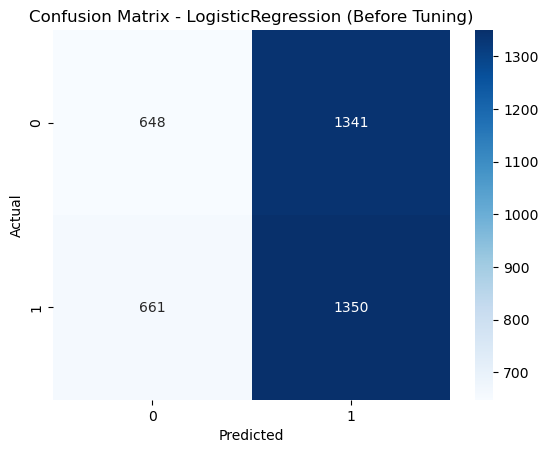

In [716]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    fbeta_score, confusion_matrix, precision_score, recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(pipe, X_train, y_train, X_test, y_test, scorer, status):
    """
    Evaluate a classification pipeline using cross-validation and F-beta score.
    Optionally display precision, recall, and F1-score.

    Parameters:
    - pipe: scikit-learn Pipeline
    - X_train, y_train: Training data
    - X_test, y_test: Test data (only used for final evaluation)
    - scorer: scoring function (e.g., from make_scorer)
    - status: string indicating evaluation context ('Before' or 'After')
    """
    metric_name = scorer._score_func.__name__
    beta = scorer._kwargs.get('beta')  # Get beta from scorer if exists
    
    # Cross-validation (safe - only uses training data)
    cv_scores = cross_val_score(
        pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=scorer,
        groups=X_train.index if hasattr(X_train, 'index') else None
    )

    # Fit and predict (proper train-test separation)
    pipe.fit(X_train, y_train)
    y_pred_test = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)  # For training metric calculation

    # Calculate metrics    
    if metric_name == 'fbeta_score':
        train_metric = fbeta_score(y_train, y_pred_train, beta=beta)
        test_metric = fbeta_score(y_test, y_pred_test, beta=beta)
    elif metric_name == 'precision_score':
        train_metric = precision_score(y_train, y_pred_train)
        test_metric = precision_score(y_test, y_pred_test)
    elif metric_name == 'recall_score':
        train_metric = recall_score(y_train, y_pred_train)
        test_metric = recall_score(y_test, y_pred_test)
    elif metric_name == 'f1_score':
        train_metric = f1_score(y_train, y_pred_train)
        test_metric = f1_score(y_test, y_pred_test)
    elif metric_name == 'accuracy_score':
        train_metric = accuracy_score(y_train, y_pred_train)
        test_metric = accuracy_score(y_test, y_pred_test)
    elif metric_name == 'roc_auc_score':
        # Use predicted probabilities for ROC AUC
        y_pred_proba_train = model.predict_proba(X_train)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        train_metric = roc_auc_score(y_train, y_pred_proba_train)
        test_metric = roc_auc_score(y_test, y_pred_proba_test)
    else:
        raise ValueError(f"Unsupported metric: {metric_name}")

    print(f"\n{' EVALUATION RESULTS ':=^69}")
    print(f"│ {'Model:':<15} {SELECTED_MODEL.upper():<50}│")
    print(f"│ {'Stage:':<15} {status:<50}│")
    beta_display = f"β={beta}" if beta is not None else ""

    print(f"│ {'Metric:':<15} {metric_name + ' ' + beta_display:<50}│")
    print(f"│ {'CV Scores:':<15} {str(np.round(cv_scores, 4)):<50}│")
    print(f"│ {'CV Mean:':<15} {str(round(np.mean(cv_scores),4))+ ' ± ' +str(round(np.std(cv_scores),4)):<50}│")
    print(f"{'':-^69}")
    print(f"│ {'Train Score:':<15} {str(round(train_metric,4)):<50}│")
    print(f"│ {'Test Score:':<15} {str(round(test_metric,4)):<50}│")
    print(f"{'':=^69}")

    # Confusion Matrix (test set only)
    print("\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
    plt.title(f"Confusion Matrix - {type(pipe.steps[-1][1]).__name__} ({status})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return [cm,test_metric]

# Before tuning
pipe_basic = Pipeline([
    ('preprocessing', transformer),
    ('model', models[SELECTED_MODEL])
])

base_cm = evaluate_model(pipe_basic, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='Before Tuning')

### Hyperparameter Tuning

In [717]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

resampling_methods = {
    "none": None,
    "undersampling": RandomUnderSampler(random_state=42),
    "oversampling": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42, sampling_strategy='minority'),
    "nearmiss": NearMiss(sampling_strategy='majority')
}

# Define parameter distributions for each model type
param_distributions = {
    'XGBoost': {
        'resampler': list(resampling_methods.values()),
        'model__n_estimators': [50, 100, 200, 500],  # Number of boosting rounds
        'model__max_depth': [3, 5, 7, 10],  # Max depth of trees
        'model__learning_rate': [0.001, 0.01, 0.1, 0.3],  # Step size shrinkage
        'model__subsample': [0.5, 0.7, 0.9, 1.0],  # Fraction of samples per boosting round
        'model__colsample_bytree': [0.5, 0.7, 0.9, 1.0]  # Fraction of features per tree
    },
    'KNN': {
        'resampler': list(resampling_methods.values()),
        'model__n_neighbors': [3, 5, 10, 15, 20, 25, 30],  # Number of neighbors to use
        'model__weights': ['uniform', 'distance'],  # Weight function for prediction
        'model__p': [1, 2, 3]  # Power parameter for distance metric
    },
        'Logistic_Regression': {
        'resampler': list(resampling_methods.values()),  # Resampling method (e.g. SMOTE, undersampling)
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse regularization strength
        'model__penalty': ['l1', 'l2'],  # Type of regularization
        'model__solver': ['liblinear', 'saga'],  # Optimization algorithm
        'model__max_iter': [100, 500, 1000]  # Max iterations for convergence
    },
}

# Create pipeline
pipe = Pipeline([
    ('preprocessing', transformer),
    ('resampler', None),  # Will be set by RandomizedSearchCV
    ('model', models[SELECTED_MODEL])
])

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions[SELECTED_MODEL],
    n_iter=20,
    scoring=scorers[SELECTED_SCORER],
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0
)


grid_search = GridSearchCV(
    estimator = pipe,
    cv = 5,
    scoring = scorers[SELECTED_SCORER],
    refit=True,  # Uses the same metric as scoring
    n_jobs= -1,
    param_grid= param_distributions[SELECTED_MODEL]   
)

# Fit the model
selected_search = random_search # choose here between random_search or grid_search
selected_search.fit(X_train, y_train)

# Best parameters and model
best_model = selected_search.best_estimator_
print("Best score:", selected_search.best_score_)
print("Best parameters:")
df_hyper = pd.DataFrame({'Parameter' : selected_search.best_params_.keys(),'Setting' :selected_search.best_params_.values()})
df_hyper

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Best score: 0.6830921316433305
Best parameters:


,Parameter,Setting
0,resampler,None
1,model__solver,saga
2,model__penalty,l2
3,model__max_iter,100
4,model__C,0.001


In [718]:
result_test = pd.DataFrame(selected_search.cv_results_).sort_values(by='rank_test_score',ascending=True).drop(columns=['mean_fit_time','std_fit_time','mean_score_time','std_score_time','params']).head(3)
front_cols = ['rank_test_score', 'mean_test_score', 'std_test_score']
result_test = result_test[front_cols + [col for col in result_test.columns if col not in front_cols]]
print(f'Model : {SELECTED_MODEL}, Main Scorer : {SELECTED_SCORER}')
result_test

Model : Logistic_Regression, Main Scorer : f2


,rank_test_score,mean_test_score,std_test_score,param_resampler,param_model__solver,param_model__penalty,param_model__max_iter,param_model__C,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
6,1,0.683092,0.078782,None,saga,l2,100,0.001,0.611469,0.687087,0.832554,0.632177,0.652174
2,2,0.654555,0.110905,None,saga,l1,1000,10.000,0.766251,0.796023,0.499253,0.612831,0.598417
9,3,0.582952,0.221339,NearMiss(sampling_strategy='majority'),liblinear,l1,100,0.100,0.786775,0.778446,0.177259,0.569023,0.603255



======================== EVALUATION RESULTS =========================
│ Model:          LOGISTIC_REGRESSION                               │
│ Stage:          After Tuning                                      │
│ Metric:         fbeta_score β=2                                   │
│ CV Scores:      [0.6115 0.6871 0.8326 0.6322 0.6522]              │
│ CV Mean:        0.6831 ± 0.0788                                   │
---------------------------------------------------------------------
│ Train Score:    0.6947                                            │
│ Test Score:     0.6935                                            │

Confusion Matrix (Test Set):


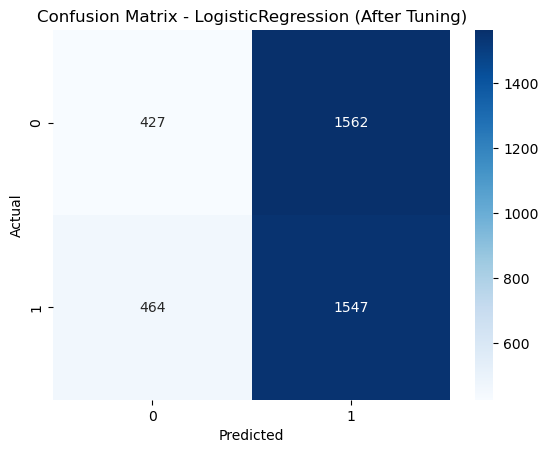

In [719]:
# After tuning
pipe_tune = best_model

tuned_cm = evaluate_model(pipe_tune, X_train, y_train, X_test, y_test, 
               scorer=scorers[SELECTED_SCORER], status='After Tuning')


Score Before : 0.6288, After : 0.6935, Improvement : 10.3 %


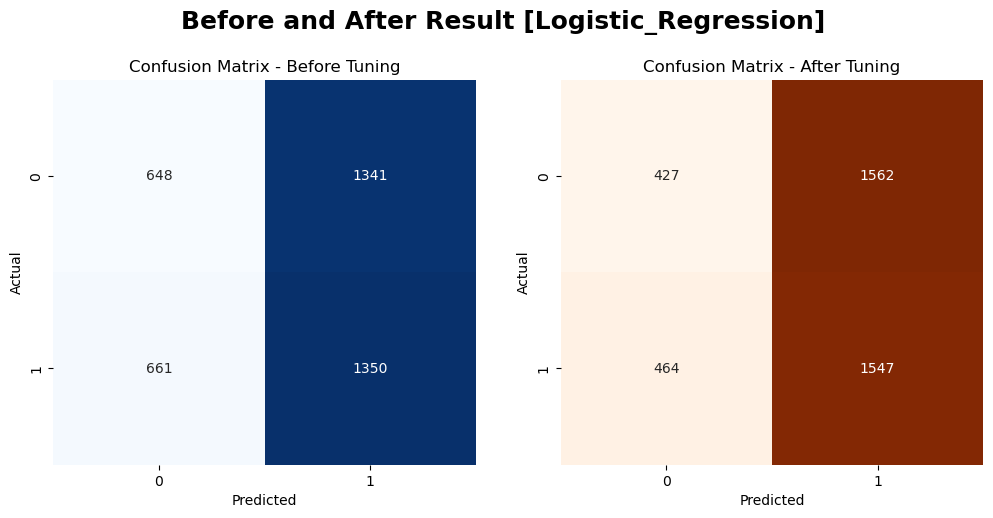

In [720]:
print(f'Score Before : {round(base_cm[1],4)}, After : {round(tuned_cm[1],4)}, Improvement : {round((tuned_cm[1]-base_cm[1])/base_cm[1]*100,2)} %')
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(base_cm[0], annot=True, fmt='g', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title("Confusion Matrix - Before Tuning")
axes[0].set_xlabel("Predicted")  # Fixed: using set_xlabel() method
axes[0].set_ylabel("Actual")     # Fixed: using set_ylabel() method

# Confusion Matrix After Tuning
sns.heatmap(tuned_cm[0], annot=True, fmt='g', ax=axes[1], cmap='Oranges', cbar=False)
axes[1].set_title("Confusion Matrix - After Tuning")
axes[1].set_xlabel("Predicted")  # Added xlabel for second plot
axes[1].set_ylabel("Actual")           # Clear ylabel for second plot to avoid duplication

fig.suptitle(f'Before and After Result [{SELECTED_MODEL}]', fontsize=18, fontweight='bold', y=1.02)
# plt.tight_layout()
plt.show()

# Execute

In this part I will explain how the model works.

## Feature Importance

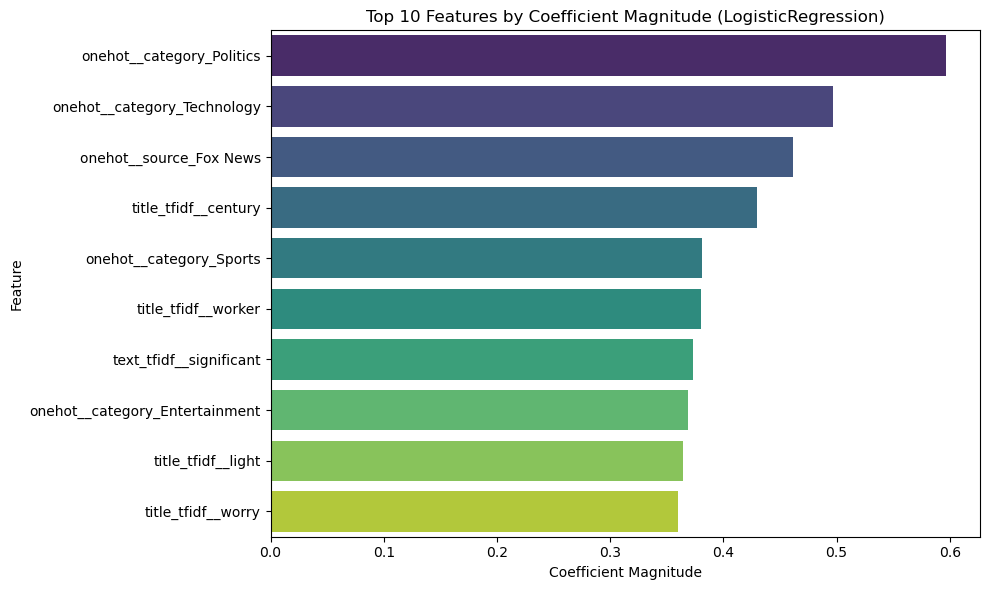

In [721]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model_pipeline, X, y, top_n=20, random_state=42):
    """
    Plots top N feature importances for various model types, including KNN.
    
    Parameters:
    - model_pipeline: A trained scikit-learn pipeline object
    - X: Feature matrix (pre-transformation)
    - y: Target vector
    - top_n: Number of top features to display
    - model_name: Name of the model (for the plot title)
    - random_state: Random seed for permutation importance
    """
    # Get transformed feature names
    try:
        feature_names = model_pipeline.named_steps['preprocessing'].get_feature_names_out()
    except AttributeError:
        feature_names = np.array([f'Feature {i}' for i in range(X.shape[1])])
    
    model = model_pipeline.named_steps['model']
    
    # Handle different model types
    if hasattr(model, 'coef_'):  # Linear models
        importances = np.abs(model.coef_[0])
        importance_type = "Coefficient Magnitude"
    elif hasattr(model, 'feature_importances_'):  # Tree-based models
        importances = model.feature_importances_
        importance_type = "Feature Importance"
    else:  # For KNN and other models without native importance
        # Calculate permutation importance
        X_transformed = model_pipeline.named_steps['preprocessing'].transform(X)
        result = permutation_importance(
            model, X_transformed, y, 
            n_repeats=10, 
            random_state=random_state
        )
        importances = result.importances_mean
        importance_type = "Permutation Importance"
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances,
        'Importance_Type': importance_type
    }).sort_values('Importance', ascending=False)

    # # Display top N
    # print(f"\nTop {top_n} Features by {importance_type}:")
    # print(importance_df.head(top_n))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        data=importance_df.head(top_n), 
        palette='viridis'
    )
    plt.title(f'Top {top_n} Features by {importance_type} ({type(model_pipeline.steps[-1][1]).__name__})')
    plt.xlabel(importance_type)
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    return importance_df

# Usage example:
imp = plot_feature_importance(
    pipe_basic, 
    X=X_train,  # Your raw training features (before scaling)
    y=y_train, 
    top_n=10)

In [722]:
print(f'''The feature that mostly affect the prediction is Politics, Technology, Source Fox New, word Century
Overal the top 10 is affected by News Category {imp['Feature'].head(10).str.startswith("onehot__category").sum()}
Title Name {imp['Feature'].head(10).str.startswith("title_").sum()}
and Text {imp['Feature'].head(10).str.startswith("text_").sum()}''')

The feature that mostly affect the prediction is Politics, Technology, Source Fox New, word Century
Overal the top 10 is affected by News Category 4
Title Name 4
and Text 1


In the future we can try to find this clue to determine the news is fake or not.

## Lime

In [723]:
import lime
from lime import lime_tabular

# Base Classifier

rf_lime = best_model.named_steps['model']
# Extract the preprocessing transformer (adjust based on your pipeline structure)
preprocessor = pipe_tune.named_steps['preprocessing']

# Apply the preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)


best_model.fit(X_train, y_train)
accuracy_score = rf_lime.score(X_test_transformed, y_test) # accuracy score (doesn't matter much if the data imbalance)
accuracy_score

0.4935

In [724]:
preprocessor = pipe_tune.named_steps['preprocessing']
best_model.fit(X_train, y_train)
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed = X_train_transformed.toarray() if hasattr(X_train_transformed, "toarray") else X_train_transformed

X_test_transformed = preprocessor.transform(X_test)
X_test_transformed = X_test_transformed.toarray() if hasattr(X_test_transformed, "toarray") else X_test_transformed

def get_feature_names_from_column_transformer(ct):
    feature_names = []

    for name, transformer, columns in ct.transformers_:
        if transformer == 'drop' or isinstance(transformer, str):
            continue

        if hasattr(transformer, 'named_steps'):
            # Get the last step (e.g., TfidfVectorizer)
            last_step = list(transformer.named_steps.values())[-1]
            if hasattr(last_step, 'get_feature_names_out'):
                names = last_step.get_feature_names_out()
                feature_names.extend([f"{name}__{n}" for n in names])
            else:
                feature_names.extend([f"{name}__{col}" for col in columns])
        elif hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out()
            feature_names.extend([f"{name}__{n}" for n in names])
        else:
            feature_names.extend([f"{name}__{col}" for col in columns])

    return feature_names
feature_names = get_feature_names_from_column_transformer(preprocessor)


In [725]:
X_test_transformed[0]  # Check if it's mostly zeros


array([   0.,    0.,    0., ...,   11.,   12., 2023.])

In [726]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed,
    feature_names=feature_names,
    mode='classification'
)
# Predict (from the transformed input)
pred = best_model.predict(X_test.iloc[[150]])[0]
print(f'Data from row 0 test will result : {pred}')

# Explain row 0
exp = explainer.explain_instance(
    X_test_transformed[150],
    rf_lime.predict_proba,
    num_features=10)
exp.show_in_notebook()


Data from row 0 test will result : True


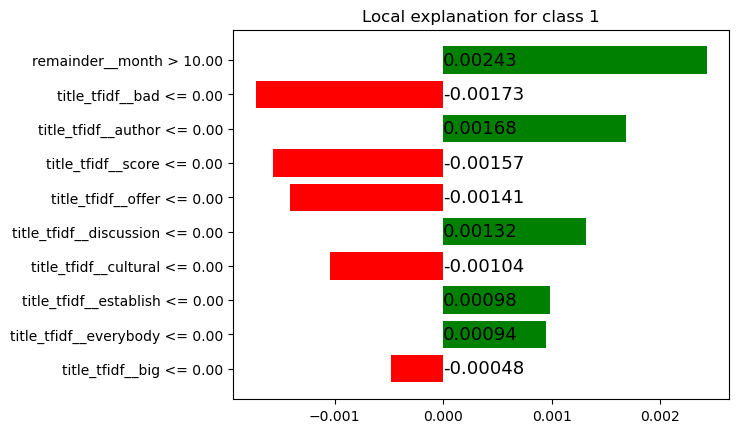

In [727]:
# Plot the explanation
fig = exp.as_pyplot_figure()

# Extract only the importance scores from exp.as_list()
feature_importances = exp.as_list()
importance_scores = [importance for _, importance in feature_importances]
importance_scores_sorted = sorted(importance_scores, key=lambda x: abs(x), reverse=False)

# Annotate the plot with the importance scores
for i, importance in enumerate(importance_scores_sorted):
    plt.annotate(
        f'{importance:.5f}',  # Importance score to annotate
        xy=(0, 0),  # Position based on the importance and feature index
        xytext=(0 , i+round(sum(importance_scores_sorted) / len(importance_scores_sorted),2)+0.5),  # Offset to the right for better readability
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=13,  # Font size for clarity
    )

# Show the plot
plt.show()


As we can see in the row 150 data, the prediction is toward True or Fake News,

We can see all the feature that contribute to the prediction.

## Shap

In this part we will see as a whole which feature contribute the most to prediction, if the data is on the right it will contribute to True and vice versa.

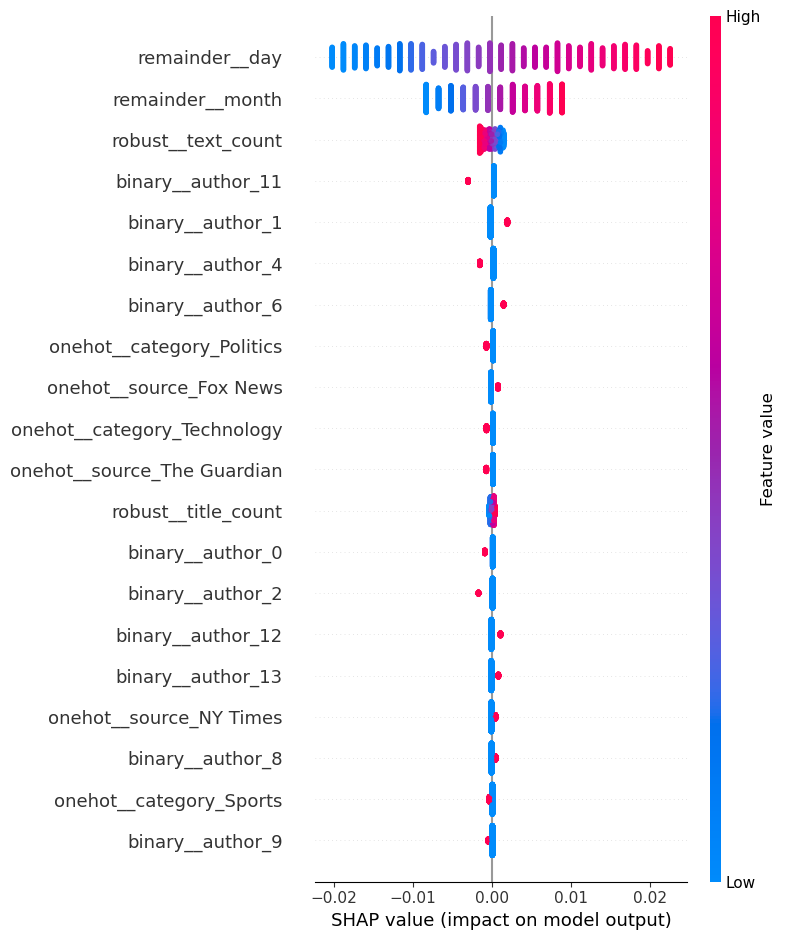

In [728]:
import shap


def explain_model_with_shap(pipeline, X_test, sample_size=1000, random_state=42):
    """
    Automatically selects SHAP explainer depending on the model type.
    
    Parameters:
    - pipeline: trained sklearn pipeline
    - X_test: raw test feature DataFrame
    - sample_size: number of samples to use for explanation (to reduce compute time)
    """
    # Extract steps
    preprocessor = pipeline.named_steps.get('preprocessing') or pipeline.named_steps.get('transformer')
    model = pipeline.named_steps.get('model') or pipeline.named_steps.get('modeling')
    
    # Transform X_test using preprocessor
    if preprocessor:
        X_test_transformed = preprocessor.transform(X_test)
        if hasattr(preprocessor, 'get_feature_names_out'):
            feature_names = preprocessor.get_feature_names_out()
        else:
            feature_names = [f'Feature {i}' for i in range(X_test_transformed.shape[1])]
    else:
        X_test_transformed = X_test.values
        feature_names = X_test.columns

    # Convert sparse to dense if needed
    if hasattr(X_test_transformed, 'toarray'):
        X_test_transformed = X_test_transformed.toarray()

    # Create DataFrame
    X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)
    X_sample = shap.sample(X_test_df, sample_size, random_state=random_state)

    # Choose appropriate SHAP explainer
    try:
        explainer = shap.Explainer(model, X_sample)
        shap_values = explainer(X_sample)
    except Exception as e:
        print(f"Falling back to KernelExplainer due to: {e}")
        explainer = shap.KernelExplainer(model.predict, X_sample)
        shap_values = explainer.shap_values(X_sample)

    # Plot summary
    shap.summary_plot(shap_values, X_sample, feature_names=feature_names)

# Example usage:
explain_model_with_shap(pipe_tune, X_test)


## Export the Model

We will export the model so we can use it in the future without running all the proccess again.

In [729]:
import pickle

# Save model

#fit
best_model.fit(X, y)


filename = 'Prediction_Model.sav'

# save with pickle
pickle.dump(best_model, open(f'dataset/{filename}', 'wb'))

# Load model
loaded_model = pickle.load(open(f'dataset/{filename}', 'rb'))
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('title_tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'title'),
                                                 ('text_tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer())]),
                                                  'text'),
                                                 ('binary', BinaryEncoder(),
                                                  ['author']),
                                                 ('robust', RobustScaler(),
                                                  ['text_count',
                                                   'title_count']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['source', 'category'])])),
                ('resampler', None),
                ('model',
                 LogisticRegression(C=0.001, random_state=42, solver='saga'))])

In [730]:
y_test.iloc[0]

True

In [731]:
y_pred_one = loaded_model.predict(X_test.iloc[[0]])
y_pred_one

array([ True])

# 📌 Conclusion

> **Disclaimer**: This dataset has been synthetically generated to closely resemble real news articles.



## 🔍 Key Insights from Data Analysis

1. 📏 **Text Length**: The number of words in fake news articles is slightly shorter than in real news, though the difference is not significant.
2. ✍️ **Top Fake News Authors**: The most frequent authors of fake news articles include:
   - James Smith  
   - Christopher Johnson  
   - John Brown  
   - Michael Williams  
   - David Garcia
3. 📰 **Media Sources**: The media outlets most associated with fake news are:
   - Daily News  
   - NY Times  
   - CNN
4. 📅 **Publication Date**: The majority of fake news articles were published in **November 2022**.
5. 🧠 **Common Words in Fake News**: Frequently used words include **“summer”**, **“moment”**, and **“wide”**—suggesting the need for deeper semantic/contextual analysis in the future.
6. 🗂️ **Category Distribution**: Fake news articles are most commonly found in the **Health**, **Business**, and **Entertainment** categories. However, the difference in distribution across categories is not substantial.



## 🧠 Modeling Performance

- ✅ A classification model was successfully built using **Logistic Regression**.
- 📊 On the test dataset, the model achieved an **F2 Score of 0.6935**, indicating a reasonable balance between **recall** and **precision**, with an emphasis on reducing **false negatives**.



This project demonstrates the potential of using basic NLP techniques and structured metadata to effectively detect fake news articles.


## 🚀 Future Improvements

To enhance the accuracy and reliability of the fake news detection model, the following improvements are recommended:

1. **Use Real News Articles**  
   Shift from synthetic datasets to real-world news snippets to better capture the complexity, tone, and context of genuine and fake news content.

2. **Leverage More Advanced Models (e.g., Keras / Deep Learning)**  
   Incorporate deep learning approaches such as neural networks (e.g., LSTM, BERT, or CNN models via Keras or TensorFlow) to better capture semantic patterns and contextual relationships in text data.

3. **Improve Semantic Understanding**  
   Use more advanced NLP techniques like word embeddings (Word2Vec, GloVe, BERT) or sentence transformers to go beyond simple bag-of-words. This helps the model grasp the **real meaning** behind sentences and better handle nuances in language.

These enhancements will help reduce misclassifications and improve the model’s robustness in real-world applications.
